### DATASET

**Download Dataset**

In [ ]:
!mkdir data
!mkdir data/fashion
!wget -O data/fashion/train-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
!wget -O data/fashion/train-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
!wget -O data/fashion/t10k-images-idx3-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-images-idx3-ubyte.gz
!wget -O data/fashion/t10k-labels-idx1-ubyte.gz http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/t10k-labels-idx1-ubyte.gz

mkdir: cannot create directory ‘data’: File exists
mkdir: cannot create directory ‘data/fashion’: File exists
--2019-08-10 02:16:18--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-images-idx3-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)... 52.219.72.198
Connecting to fashion-mnist.s3-website.eu-central-1.amazonaws.com (fashion-mnist.s3-website.eu-central-1.amazonaws.com)|52.219.72.198|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26421880 (25M) [binary/octet-stream]
Saving to: ‘data/fashion/train-images-idx3-ubyte.gz’

data/fashion/train- 100%[===================>]  25.20M  12.3MB/s    in 2.1s    

2019-08-10 02:16:20 (12.3 MB/s) - ‘data/fashion/train-images-idx3-ubyte.gz’ saved [26421880/26421880]

--2019-08-10 02:16:21--  http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/train-labels-idx1-ubyte.gz
Resolving fashion-mnist.s3-website.eu-central-1.amazo

### PREPROCESSING

**Import Dataset**

In [ ]:
# Import libraries
from __future__ import division, print_function, absolute_import
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib.pyplot as plt
import numpy as np
# Import Fashion MNIST
fashion_mnist = input_data.read_data_sets('data/fashion',one_hot=True)

Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


**Bentuk Dataset**

In [ ]:
# Shapes of training set
print("Training set (images) shape: {shape}".format(shape=fashion_mnist.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=fashion_mnist.train.labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=fashion_mnist.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=fashion_mnist.test.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


**Visualisasi Dataset**

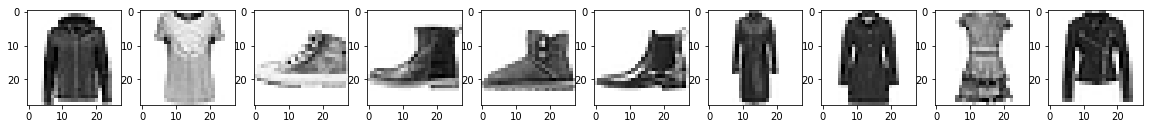

In [ ]:
f, a = plt.subplots(1, 10, figsize=(20, 20))
for i in range(10):
    a[i].imshow(np.reshape(fashion_mnist.train.images[i], (28, 28)), cmap='Greys')


### TRAINING

In [ ]:
import tensorflow as tf
sess = tf.InteractiveSession()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/client/session.py:1735: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
learning_rate = 0.01
epochs = 60
batch_size = 256
display_step = 1
examples_to_show = 20

# Network Parameters
hidden_1 = 50 # 1st layer num features
hidden_2 = 25 # 2nd layer num features
hidden_3 = 5 # 3rd layer num features
input_size = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
x = tf.placeholder("float", [None, input_size])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([input_size, hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([hidden_1, hidden_2])),
    'encoder_h3': tf.Variable(tf.random_normal([hidden_2, hidden_3])),
    'decoder_h1': tf.Variable(tf.random_normal([hidden_3, hidden_2])),
    'decoder_h2': tf.Variable(tf.random_normal([hidden_2, hidden_1])),
    'decoder_h3': tf.Variable(tf.random_normal([hidden_1, input_size])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([hidden_2])),
    'encoder_b3': tf.Variable(tf.random_normal([hidden_3])),
    'decoder_b1': tf.Variable(tf.random_normal([hidden_2])),
    'decoder_b2': tf.Variable(tf.random_normal([hidden_1])),
    'decoder_b3': tf.Variable(tf.random_normal([input_size])),
}

In [ ]:
# Building the encoder
def encoder(x):
    # Encoder first layer with sigmoid activation #1
    layer1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']), biases['encoder_b1']))
    # Encoder second layer with sigmoid activation #2
    layer2 = tf.nn.sigmoid(tf.add(tf.matmul(layer1, weights['encoder_h2']), biases['encoder_b2']))
    # Encoder third layer with sigmoid activation #3
    layer3 = tf.nn.sigmoid(tf.add(tf.matmul(layer2, weights['encoder_h3']), biases['encoder_b3']))
    return layer3

In [ ]:
# Building the decoder
def decoder(x):
    # Decoder first layer with sigmoid activation #1
    layer1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']), biases['decoder_b1']))
    # Decoder second layer with sigmoid activation #2
    layer2 = tf.nn.sigmoid(tf.add(tf.matmul(layer1, weights['decoder_h2']), biases['decoder_b2']))
    layer3 = tf.nn.sigmoid(tf.add(tf.matmul(layer2, weights['decoder_h3']), biases['decoder_b3']))
    return layer3

In [ ]:
# Construct model
encoder_op = encoder(x)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = x

# Define loss and optimizer, minimize the squared error
mse =tf.reduce_mean(tf.square(y_pred - y_true))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(mse)


# Initializing the variables
init = tf.global_variables_initializer()

In [ ]:
# Launch the graph
sess.run(init)

total_batch = int(fashion_mnist.train.num_examples/batch_size)
# Training cycle
for epoch in range(epochs):
    # Loop over all batches
    for i in range(total_batch):
        batch_x, batch_y = fashion_mnist.train.next_batch(batch_size)
        # Run optimization op (backprop) and cost op (to get loss value)
        _, c = sess.run([optimizer, mse], feed_dict={x: batch_x})
    # Display logs per epoch step
    if epoch % display_step == 0:
        print("Epoch :", '%02d' % (epoch+1), ", MSE :", "{:.3f}".format(c))

print("Optimization Finished!")

Epoch : 01 , MSE : 0.120
Epoch : 02 , MSE : 0.062
Epoch : 03 , MSE : 0.053
Epoch : 04 , MSE : 0.051
Epoch : 05 , MSE : 0.046
Epoch : 06 , MSE : 0.041
Epoch : 07 , MSE : 0.040
Epoch : 08 , MSE : 0.038
Epoch : 09 , MSE : 0.039
Epoch : 10 , MSE : 0.037
Epoch : 11 , MSE : 0.035
Epoch : 12 , MSE : 0.036
Epoch : 13 , MSE : 0.036
Epoch : 14 , MSE : 0.035
Epoch : 15 , MSE : 0.033
Epoch : 16 , MSE : 0.032
Epoch : 17 , MSE : 0.034
Epoch : 18 , MSE : 0.032
Epoch : 19 , MSE : 0.038
Epoch : 20 , MSE : 0.030
Epoch : 21 , MSE : 0.032
Epoch : 22 , MSE : 0.030
Epoch : 23 , MSE : 0.033
Epoch : 24 , MSE : 0.032
Epoch : 25 , MSE : 0.029
Epoch : 26 , MSE : 0.029
Epoch : 27 , MSE : 0.032
Epoch : 28 , MSE : 0.029
Epoch : 29 , MSE : 0.029
Epoch : 30 , MSE : 0.030
Epoch : 31 , MSE : 0.027
Epoch : 32 , MSE : 0.028
Epoch : 33 , MSE : 0.027
Epoch : 34 , MSE : 0.026
Epoch : 35 , MSE : 0.026
Epoch : 36 , MSE : 0.028
Epoch : 37 , MSE : 0.028
Epoch : 38 , MSE : 0.029
Epoch : 39 , MSE : 0.027
Epoch : 40 , MSE : 0.026


### TESTING

In [ ]:
encode_decode, ls = sess.run([y_pred, mse], feed_dict={x: fashion_mnist.test.images[:examples_to_show]})

print("Testing MSE :", "{:.3f}".format(ls))



Testing MSE : 0.027


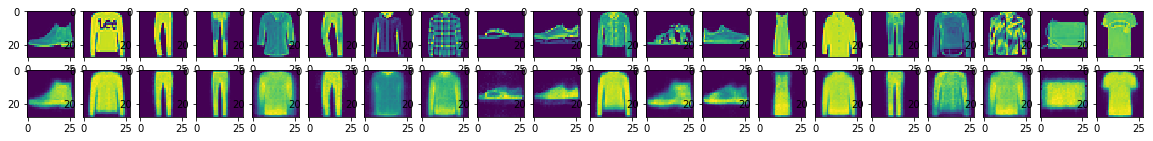

In [ ]:
# Compare original images with their reconstructions
f, a = plt.subplots(2, 20, figsize=(20, 2))
for i in range(examples_to_show):
    a[0][i].imshow(np.reshape(fashion_mnist.test.images[i], (28, 28)))
    a[1][i].imshow(np.reshape(encode_decode[i], (28, 28)))